#### Ozeas dos Santos Nascimento <br>
Cientista de Dados / Analista de Dados <br>

# Clusterização de clientes - Energia elétrica <br>
Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption# <br>
<br>
<br>
Informações do conjunto de dados:<br>
<br>
Este arquivo contém 2075259 medições coletadas em uma casa localizada em Sceaux (7km de Paris, França) entre dezembro de 2006 e novembro de 2010 (47 meses).<br>
Notas:<br>
<br>
(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) representa a energia ativa consumida a cada minuto (em watt hora) na casa por equipamentos elétricos não medidos nos sub-medidores 1, 2 e 3.<br>
O conjunto de dados contém alguns valores ausentes nas medições (cerca de 1,25% das linhas). Todos os carimbos de data e hora do calendário estão presentes no conjunto de dados, mas para alguns carimbos de data e hora, os valores das medições estão ausentes: um valor ausente é representado pela ausência de valor entre dois separadores de atributos de ponto e vírgula consecutivos. Por exemplo, o conjunto de dados mostra valores ausentes em 28 de abril de 2007.<br><br>
Informações de atributos:<br>
<br>
Data: Data no formato dd/mm/aaaa<br>
Hora: hora no formato hh:mm:ss<br>
Potência ativa global: potência ativa média em minutos da casa (em quilowatt)<br>
Potência reativa global: potência reativa média em minutos da casa (em quilowatt)<br>
Voltagem: voltagem média em minutos (em volts)<br>
Intensidade global: intensidade de corrente média em minutos da casa (em ampère)<br>
Sub-medidor de energia 1: sub-medidor de energia No. 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo principalmente uma máquina de lavar louça, um forno e um micro-ondas (as placas quentes não são elétricas, mas a gás).<br>
Sub-medidor de energia 2: sub-medidor de energia No. 2 (em watt-hora de energia ativa). Corresponde à lavanderia, contendo uma máquina de lavar, uma secadora, uma geladeira e uma luz.<br>
Sub-medidor de energia 3: sub-medidor de energia No. 3 (em watt-hora de energia ativa). Corresponde a um aquecedor de água elétrico e um ar condicionado.<br>

In [1]:
import pandas as pd
from zipfile import ZipFile
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

Descompactando os dados

In [3]:
z = ZipFile('base/household_power_consumption.zip')
z.extractall()
z.close

<bound method ZipFile.close of <zipfile.ZipFile filename='base/household_power_consumption.zip' mode='r'>>

Carregando os dados

In [4]:
df_elect = pd.read_csv('household_power_consumption.txt', delimiter=';')
df_elect

C:\Users\ozeas\AppData\Local\Temp\ipykernel_26636\3264607396.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_elect = pd.read_csv('household_power_consumption.txt', delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


#### Analise Exploratória

In [5]:
# Checando estado atual dos dados
df_elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
# Conferindo quantidade NA
df_elect.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [6]:
df_elect['Sub_metering_3'].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., nan, 12.,  1., 14.,  7., 23., 25., 26., 28.,
       27., 21., 22., 29., 24., 30., 31.])

In [6]:
# 1,25% dos dados são Nan - Removendo dados vazios ou nulos
na = df_elect[df_elect['Sub_metering_3'].isna()]
print('A porcentagem de dados faltantes é equivalente à :',((na.shape[0]/df_elect.shape[0])*100))
df_elect = df_elect.dropna().reset_index()
df_elect

A porcentagem de dados faltantes é equivalente à : 1.2518437457686005


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...,...
2049275,2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2049276,2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2049277,2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2049278,2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
# Deletando as colunas date, time e index. Para a o que queremos analisar não será necessário contarmos com estas colunas
df_elect = df_elect.drop(columns=['Date','Time', 'index'])

# Alterando o tipo das colunas para float
df_elect = df_elect.apply(pd.to_numeric, errors = 'coerce').astype(float)
df_elect

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [8]:
df_elect.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

#### Global_active_power

[Text(0.5, 1.0, 'Global_active_power'), Text(0, 0.5, 'Frequência')]

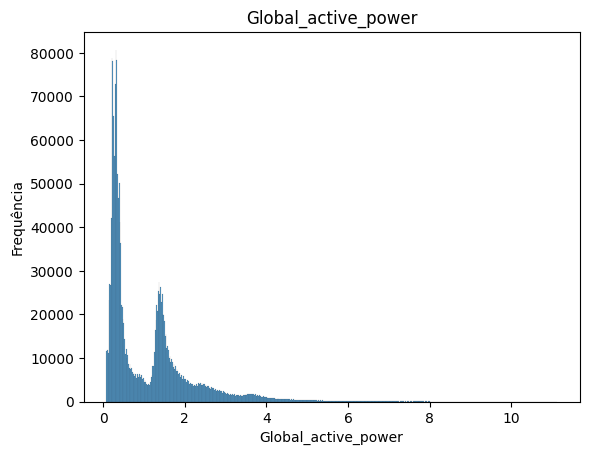

In [10]:
f = sns.histplot(x='Global_active_power', data= df_elect, stat='count') 
f.set(title='Global_active_power', ylabel='Frequência')


#### Global_reactive_power

[Text(0.5, 1.0, 'Global_reactive_power'), Text(0, 0.5, 'Frequência')]

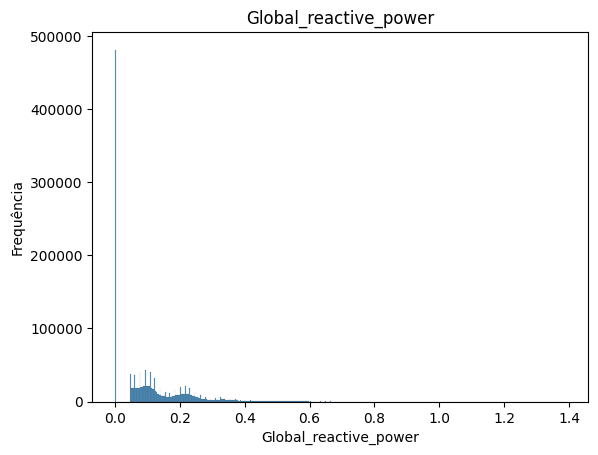

In [11]:
f = sns.histplot(x='Global_reactive_power', data= df_elect, stat='count') 
f.set(title='Global_reactive_power', ylabel='Frequência')

#### Voltage

[Text(0.5, 1.0, 'Voltage'), Text(0, 0.5, 'Frequência')]

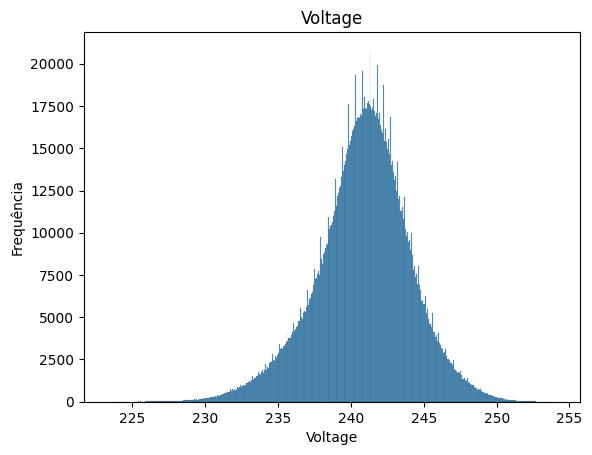

In [12]:
f = sns.histplot(x='Voltage', data= df_elect, stat='count') 
f.set(title='Voltage', ylabel='Frequência')

#### Global_intensity

[Text(0.5, 1.0, 'Global_intensity'), Text(0, 0.5, 'Frequência')]

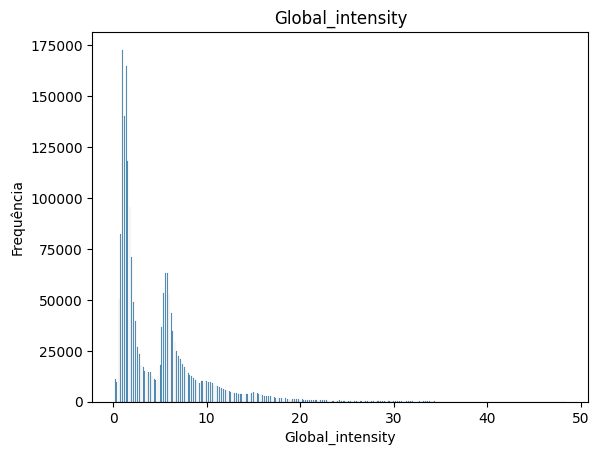

In [13]:
f = sns.histplot(x='Global_intensity', data= df_elect, stat='count') 
f.set(title='Global_intensity', ylabel='Frequência')

#### Sub_metering_1

[Text(0.5, 1.0, 'Sub_metering_1'), Text(0, 0.5, 'Frequência')]

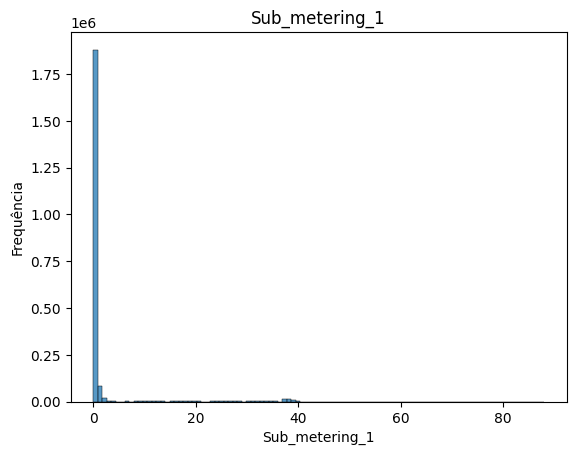

In [86]:
f = sns.histplot(x='Sub_metering_1', data= df_elect, bins = 100, stat='count') 
f.set(title='Sub_metering_1', ylabel='Frequência')

#### Sub_metering_2

[Text(0.5, 1.0, 'Sub_metering_2'), Text(0, 0.5, 'Frequência')]

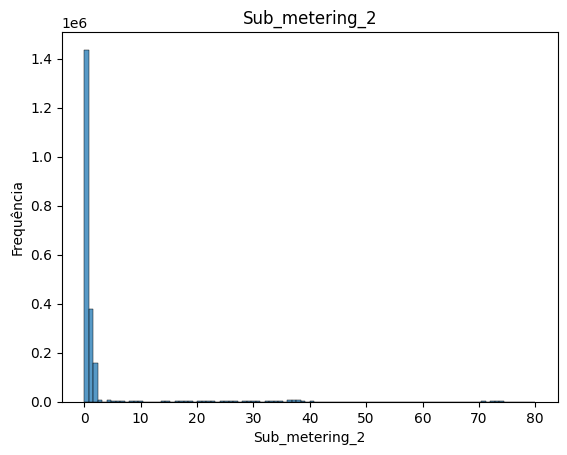

In [89]:
sns.histplot(x='Sub_metering_2', data=df_elect, bins=100, stat='count').set(title='Sub_metering_2', ylabel='Frequência')


#### Sub_metering_3

[Text(0.5, 1.0, 'Sub_metering_3'), Text(0, 0.5, 'Frequência')]

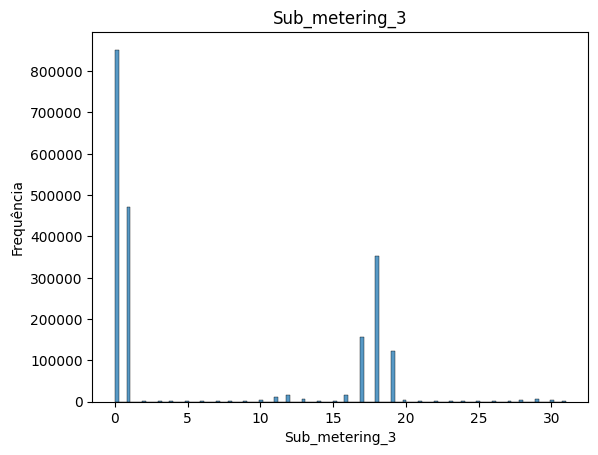

In [88]:
f = sns.histplot(x='Sub_metering_3', data= df_elect, stat='count') 
f.set(title='Sub_metering_3', ylabel='Frequência')

In [12]:
df_elect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 109.4 MB


### Analise Estatistica

In [13]:
df_elect.describe().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


In [14]:
df_elect.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Transformação ( Pré Processamento)

### Normalização

In [15]:
# Normalização dos dados

from sklearn.preprocessing import StandardScaler

stdSC = StandardScaler()
df_normal = stdSC.fit_transform(df_elect)
df_normal

array([[ 2.95507706,  2.61072061, -1.85181608, ..., -0.18233673,
        -0.05127425,  1.24942076],
       [ 4.03708463,  2.77040557, -2.2252745 , ..., -0.18233673,
        -0.05127425,  1.13089735],
       [ 4.05032598,  3.32043153, -2.33021323, ..., -0.18233673,
         0.12048729,  1.24942076],
       ...,
       [-0.14529076, -1.09751893, -0.31477235, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.149074  , -1.09751893, -0.35180955, ..., -0.18233673,
        -0.22303579, -0.7654772 ],
       [-0.15096563, -1.09751893, -0.39810605, ..., -0.18233673,
        -0.22303579, -0.7654772 ]])

Visualizando o DF

In [16]:
pd.DataFrame(df_normal)

,0,1,2,3,4,5,6
0,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421
1,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897
2,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421
3,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421
4,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421
...,...,...,...,...,...,...,...
2049275,-0.137724,-1.097519,-0.126500,-0.141247,-0.182337,-0.223036,-0.765477
2049276,-0.139616,-1.097519,-0.259217,-0.141247,-0.182337,-0.223036,-0.765477
2049277,-0.145291,-1.097519,-0.314772,-0.186248,-0.182337,-0.223036,-0.765477
2049278,-0.149074,-1.097519,-0.351810,-0.186248,-0.182337,-0.223036,-0.765477


### Maquina Preditiva PCA
Redução da dimensionalidade dos dados

In [17]:
import numpy as np
from sklearn.decomposition import PCA

In [18]:
# Criaçao de máquina Preditiva de Redução de Dimensionalidade

pca = PCA(n_components=0.95)
pca.fit(df_normal)

PCA(n_components=0.95)

In [19]:
# 5 componentes (0.95% dos dados)
print(pca.explained_variance_ratio_) # Explica a variabilidade dos dados em cada variavel.
print(pca.singular_values_)

[0.46143652 0.1410576  0.13322822 0.1213212  0.11177303]
[2572.79778382 1422.48570956 1382.44474516 1319.22243442 1266.24628035]


In [20]:
pca_df = pca.fit_transform(df_normal)
pca_df

array([[ 4.69636674,  0.68451311,  0.16833779, -2.12535205,  0.5938945 ],
       [ 5.93363569,  0.70167952,  0.18195805, -2.09915509,  0.6623514 ],
       [ 6.16438171,  1.10186453,  0.24303295, -2.4214851 ,  0.738271  ],
       ...,
       [-0.6885466 , -0.5449111 , -0.19139234,  0.81726289,  0.53123582],
       [-0.67961526, -0.54999151, -0.1934843 ,  0.81526414,  0.56663483],
       [-0.66692423, -0.55648707, -0.19618377,  0.81289274,  0.61043334]])

In [21]:
#pd.DataFrame(pca_df)

# K-means

In [22]:
from sklearn.cluster import KMeans

# Curva de Elbow

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

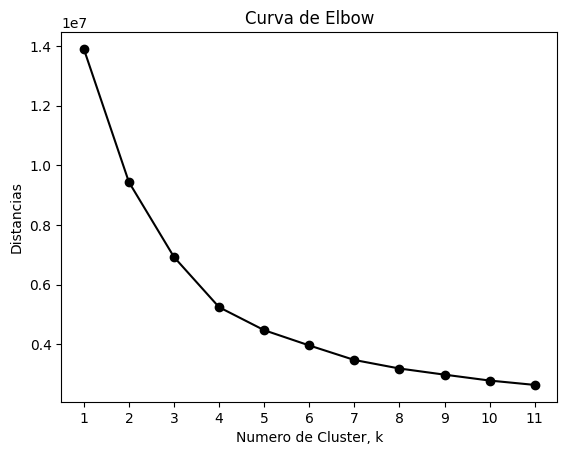

In [23]:
ks = range(1,12)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k, max_iter=200, random_state=170).fit(pca_df)

    inertias.append(model.inertia_)

plt.plot(ks,inertias, '-o', color = 'black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distancias')
plt.title('Curva de Elbow')
plt.xticks(ks)
plt.show()

### Dividindo os dados

In [39]:
from sklearn.model_selection import train_test_split

X_train, amostra2 = train_test_split(pca_df, train_size=0.1, shuffle=True,  random_state=100)
X_train.shape[0]

204928

#### Testando o melhor modelo a partir de 7 clusters

In [41]:
from sklearn.metrics import silhouette_score

In [50]:
mod_v1 = KMeans(n_clusters=7)
mod_v1.fit(X_train)
labels = mod_v1.labels_
silhouette_score(X_train, labels,metric = 'euclidean')

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3212617448861864

In [46]:
mod_v2 = KMeans(n_clusters=8)
mod_v2.fit(X_train)
labels = mod_v2.labels_
silhouette_score(X_train, labels,metric = 'euclidean')

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.30673574367228695

In [47]:
mod_v3 = KMeans(n_clusters=9)
mod_v3.fit(X_train)
labels = mod_v3.labels_
silhouette_score(X_train, labels,metric = 'euclidean')

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.3089696558811818

In [48]:
mod_v4 = KMeans(n_clusters=10)
mod_v4.fit(X_train)
labels = mod_v4.labels_
silhouette_score(X_train, labels,metric = 'euclidean')

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.297273411231656

In [49]:
mod_v5 = KMeans(n_clusters=11)
mod_v5.fit(X_train)
labels = mod_v5.labels_
silhouette_score(X_train, labels,metric = 'euclidean')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2934273610025841

## Classificando cada cliente

In [ ]:
mod_v1 = KMeans(n_clusters=8, max_iter=300, random_state=0)
cluster = mod_v1.fit_predict(X_train)
dt_km = pd.DataFrame(X_train)
dt_km['cluster'] = cluster
dt_km

c:\Users\ozeas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,cluster
0,-1.376848,1.048059,0.597683,-0.347712,-0.964098,7
1,2.176658,-1.097664,-0.665316,-1.580370,0.477216,6
2,0.339219,-0.100889,-0.234562,0.644966,0.906276,0
3,-0.702293,-0.567411,-0.199770,0.801401,0.740468,0
4,-1.271918,0.541917,0.342769,-0.106498,-0.321645,2
...,...,...,...,...,...,...
204923,-0.848857,1.215718,0.570072,-0.653755,0.728541,7
204924,-1.125184,0.179019,0.162890,0.160888,0.009415,2
204925,0.110613,1.481427,0.854477,-1.305299,1.840680,7
204926,-1.519488,0.312783,0.230648,0.257175,-0.546643,2


### Matriz confusão?

In [35]:
# CONECTANDO CLUSTERS
df_elect['cluster'] = dt_km['cluster']
df_elect

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,6
...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0,0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0,0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0,0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0,0


Informações de atributos:<br>
<br>
Data: Data no formato dd/mm/aaaa<br>
Hora: hora no formato hh:mm:ss<br>
Global_active_power - Potência ativa global: potência ativa média em minutos da casa (em quilowatt)<br>
Global_reactive_power - Potência reativa global: potência reativa média em minutos da casa (em quilowatt)<br>
Voltage - Voltagem: voltagem média em minutos (em volts)<br>
Global_intensity - Intensidade global: intensidade de corrente média em minutos da casa (em ampère)<br>
Sub_metering_1 - Sub-medidor de energia 1: sub-medidor de energia No. 1 (em watt-hora de energia ativa). Corresponde à cozinha, contendo principalmente uma máquina de lavar louça, um forno e um micro-ondas (as placas quentes não são elétricas, mas a gás).<br>
Sub_metering_2 - Sub-medidor de energia 2: sub-medidor de energia No. 2 (em watt-hora de energia ativa). Corresponde à lavanderia, contendo uma máquina de lavar, uma secadora, uma geladeira e uma luz.<br>
Sub_metering_3 - Sub-medidor de energia 3: sub-medidor de energia No. 3 (em watt-hora de energia ativa). Corresponde a um aquecedor de água elétrico e um ar condicionado.<br>

In [37]:
df_elect.groupby('cluster').agg({'Global_active_power':['median','min','mean','max'],'Global_reactive_power':['median','min','mean','max'],'Voltage':['median','min','mean','max'],'Sub_metering_1':['median','min','mean','max'],'Sub_metering_2':['median','min','mean','max'],'Sub_metering_3':['median','min','mean','max']})

Global_active_power                          Global_reactive_power  \
                     median    min      mean     max                median   
cluster                                                                      
0                     0.294  0.076  0.350197   2.090                 0.070   
1                     1.598  0.224  1.662146   3.944                 0.218   
2                     5.449  3.178  5.578094  11.122                 0.256   
3                     0.432  0.158  0.551898   2.228                 0.224   
4                     1.438  0.114  1.532942   3.580                 0.062   
5                     4.156  2.582  4.349187   9.272                 0.174   
6                     3.134  0.536  3.133192   6.366                 0.244   
7                     2.702  1.186  2.756235   5.730                 0.146   

                              Voltage          ... Sub_metering_1        \
         min      mean    max  median     min  ...           mean   max   
cluster                                        ...                        
0        0.0  0.060636  0.182  242.02  228.74  ...       0.017799  13.0   
1        0.0  0.232937  0.654  240.03  224.44  ...       0.259019  33.0   
2        0.0  0.281824  1.390  235.42  223.49  ...      11.959809  81.0   
3        0.0  0.238051  0.844  241.67  230.22  ...       0.047586  14.0   
4        0.0  0.058753  0.220  240.19  224.54  ...       0.106749  32.0   
5        0.0  0.190456  0.692  236.64  223.20  ...      32.890231  88.0   
6        0.0  0.283493  1.240  238.50  225.45  ...       2.319942  50.0   
7        0.0  0.157053  0.542  238.11  223.99  ...       3.707077  47.0   

        Sub_metering_2                       Sub_metering_3                  \
                median  min       mean   max         median  min       mean   
cluster                                                                       
0                  0.0  0.0   0.183981   7.0            0.0  0.0   0.405562   
1                  1.0  0.0   1.041658  30.0           17.0  0.0  11.443651   
2                 37.0  0.0  43.764364  80.0           17.0  0.0  13.794269   
3                  1.0  0.0   0.879209  26.0            0.0  0.0   0.677481   
4                  0.0  0.0   0.195039  10.0           18.0  0.0  16.818857   
5                  0.0  0.0   1.015524  37.0           17.0  0.0  15.449146   
6                 28.0  0.0  23.187070  58.0           17.0  0.0  10.126837   
7                  0.0  0.0   0.677334  26.0           18.0  0.0  16.734332   

               
          max  
cluster        
0        19.0  
1        31.0  
2        31.0  
3        14.0  
4        31.0  
5        31.0  
6        31.0  
7        31.0  

[8 rows x 24 columns]

In [40]:
df_elect.groupby('cluster').agg({'Voltage':['median','min','mean','max']})

Voltage                            
         median     min        mean     max
cluster                                    
0        242.02  228.74  241.987032  254.15
1        240.03  224.44  239.983279  252.61
2        235.42  223.49  235.344269  248.22
3        241.67  230.22  241.632474  253.53
4        240.19  224.54  240.087969  253.27
5        236.64  223.20  236.477518  248.51
6        238.50  225.45  238.424466  251.08
7        238.11  223.99  237.912617  250.01